# JupyterLite で学ぶ matplotlib 中級チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
matplotlib の中級レベルの機能を学ぶためのチュートリアルです。

## 対象者
- matplotlib の基礎（折れ線グラフ、棒グラフ、散布図など）を理解している方
- より高度なカスタマイズや複雑なグラフを作成したい方

## このチュートリアルで学ぶこと
1. サブプロット（複数グラフの配置）
2. オブジェクト指向スタイル（Figure と Axes）
3. 軸の詳細設定
4. 注釈とテキスト
5. 箱ひげ図とバイオリンプロット
6. ヒートマップと等高線図
7. スタイルとテーマ
8. pandas との連携
9. seaborn との連携

## 0. 環境準備（JupyterLite 用）

まず、必要なライブラリをインストールします。

In [1]:
try:
    import piplite
    await piplite.install(["numpy", "pandas", "matplotlib", "seaborn", "japanize-matplotlib-jlite"])
except ImportError:
    pass

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib_jlite

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
np.random.seed(42)

print(f"matplotlib バージョン: {plt.matplotlib.__version__}")

matplotlib バージョン: 3.10.7


---
## 1. サブプロット（複数グラフの配置）

1つの図（Figure）の中に複数のグラフ（Axes）を配置する方法を学びます。

### 1.1 plt.subplot() を使う方法

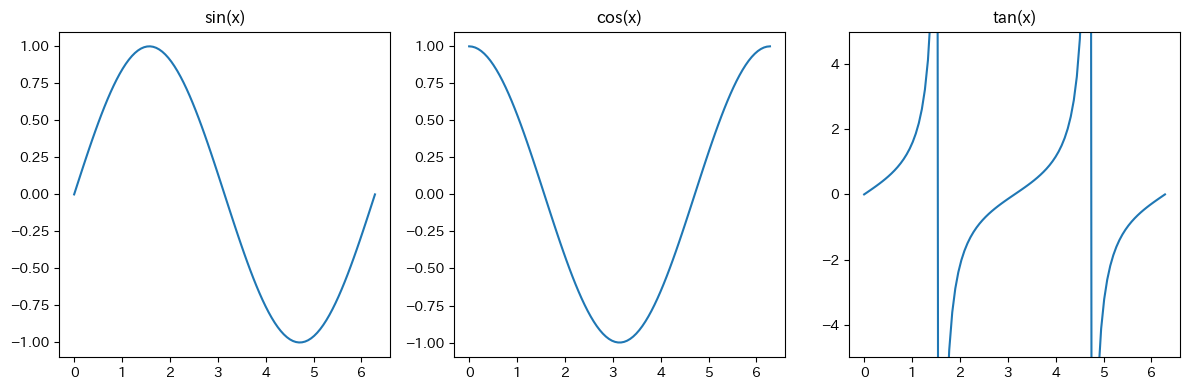

In [3]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(12, 4))

# subplot(行数, 列数, 番号)
plt.subplot(1, 3, 1)  # 1行3列の1番目
plt.plot(x, np.sin(x))
plt.title('sin(x)')

plt.subplot(1, 3, 2)  # 1行3列の2番目
plt.plot(x, np.cos(x))
plt.title('cos(x)')

plt.subplot(1, 3, 3)  # 1行3列の3番目
plt.plot(x, np.tan(x))
plt.title('tan(x)')
plt.ylim(-5, 5)  # tan は発散するので範囲を制限

plt.tight_layout()
plt.show()

### 1.2 plt.subplots() を使う方法（推奨）

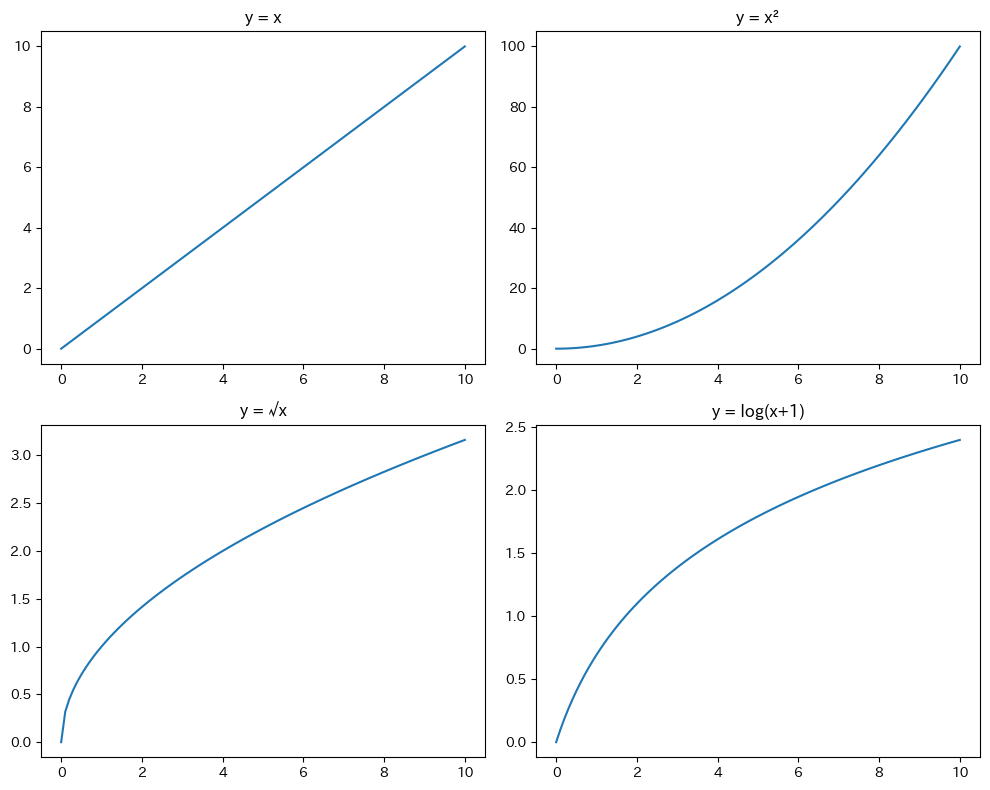

In [4]:
x = np.linspace(0, 10, 100)

# 2行2列のサブプロットを作成
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# axes[行, 列] でアクセス
axes[0, 0].plot(x, x)
axes[0, 0].set_title('y = x')

axes[0, 1].plot(x, x**2)
axes[0, 1].set_title('y = x²')

axes[1, 0].plot(x, np.sqrt(x))
axes[1, 0].set_title('y = √x')

axes[1, 1].plot(x, np.log(x + 1))
axes[1, 1].set_title('y = log(x+1)')

plt.tight_layout()
plt.show()

### 1.3 異なるサイズのサブプロット

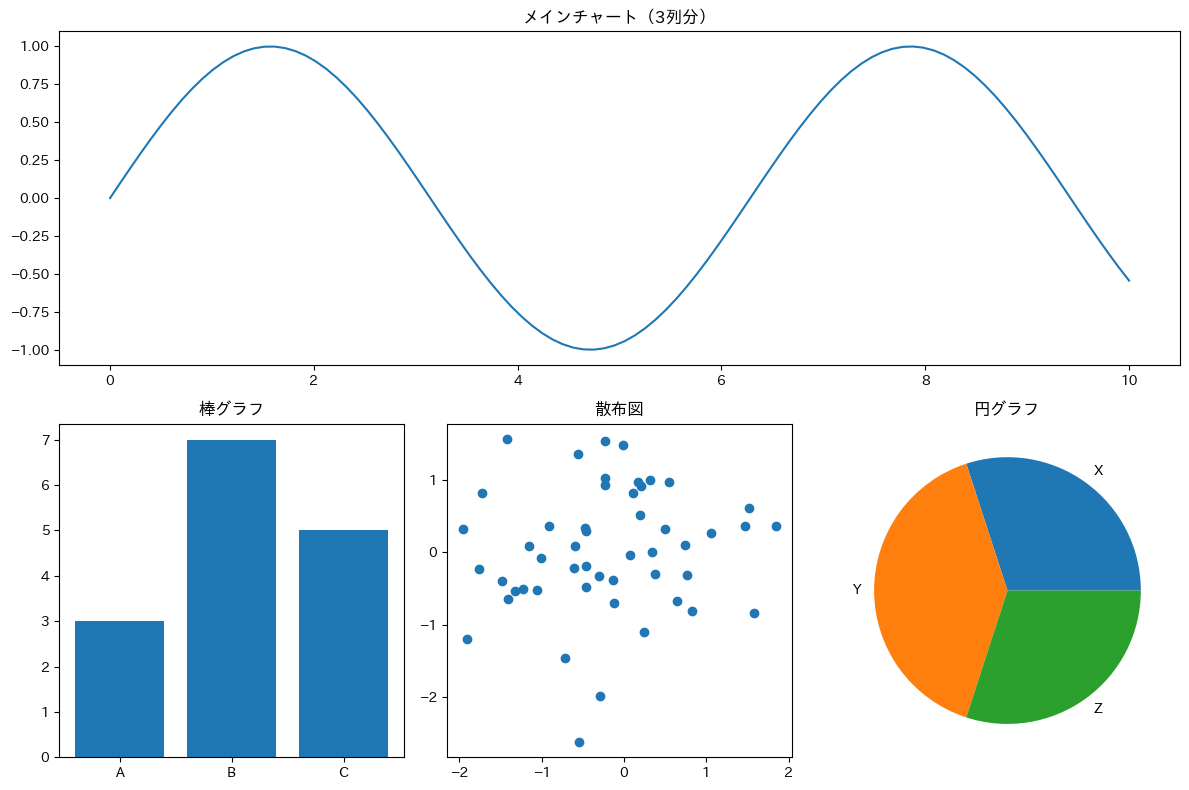

In [5]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3, figure=fig)  # 2行3列のグリッド

# 上段：3列にまたがる大きなグラフ
ax1 = fig.add_subplot(gs[0, :])  # 0行目、全列
x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x))
ax1.set_title('メインチャート（3列分）')

# 下段：3つの小さなグラフ
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(['A', 'B', 'C'], [3, 7, 5])
ax2.set_title('棒グラフ')

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(np.random.randn(50), np.random.randn(50))
ax3.set_title('散布図')

ax4 = fig.add_subplot(gs[1, 2])
ax4.pie([30, 40, 30], labels=['X', 'Y', 'Z'])
ax4.set_title('円グラフ')

plt.tight_layout()
plt.show()

### 1.4 サブプロット間でx軸・y軸を共有

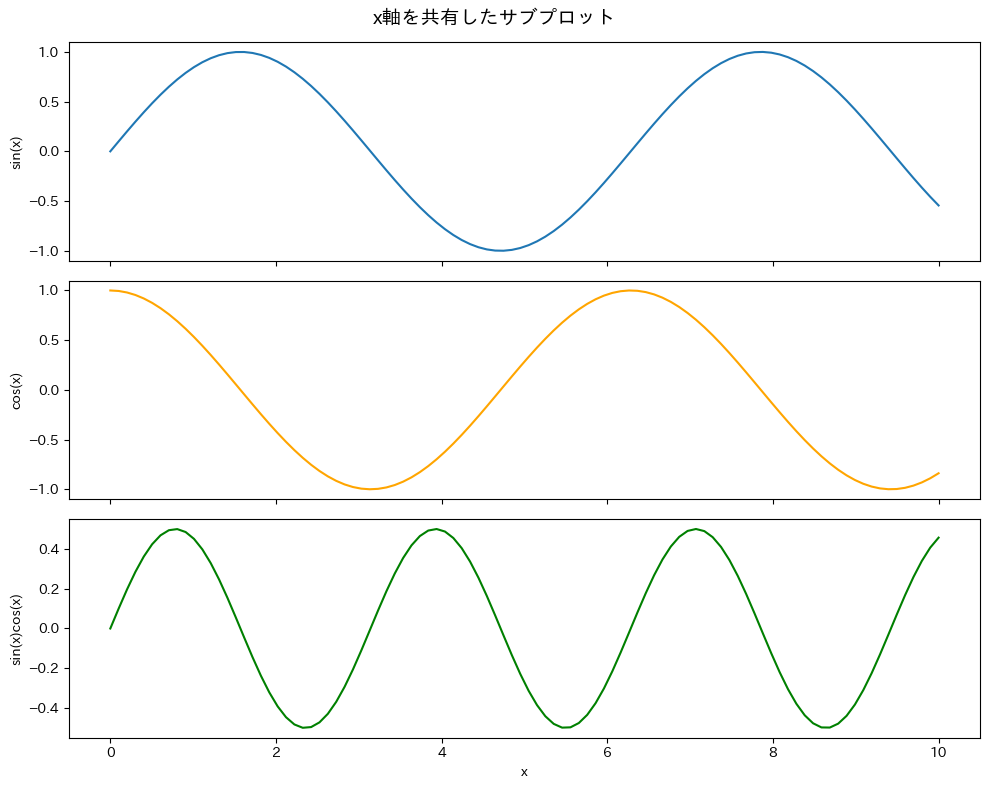

In [6]:
x = np.linspace(0, 10, 100)

# sharex=True で x軸を共有
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(x, np.sin(x))
axes[0].set_ylabel('sin(x)')

axes[1].plot(x, np.cos(x), color='orange')
axes[1].set_ylabel('cos(x)')

axes[2].plot(x, np.sin(x) * np.cos(x), color='green')
axes[2].set_ylabel('sin(x)cos(x)')
axes[2].set_xlabel('x')

fig.suptitle('x軸を共有したサブプロット', fontsize=14)
plt.tight_layout()
plt.show()

### 📝 1章 練習問題

1. 2行3列のサブプロットを作成し、それぞれに異なる種類のグラフを配置しなさい。
2. GridSpec を使って、上段に大きなグラフ、下段に2つの小さなグラフを配置しなさい。
3. y軸を共有した横並びのサブプロットを作成しなさい。

In [7]:
# 練習問題の解答欄



---
## 2. オブジェクト指向スタイル（Figure と Axes）

matplotlib には2つのスタイルがあります：
- **pyplot スタイル**: `plt.plot()` など（簡単だが柔軟性が低い）
- **オブジェクト指向スタイル**: Figure と Axes オブジェクトを明示的に操作（柔軟性が高い）

複雑なグラフにはオブジェクト指向スタイルが推奨されます。

### 2.1 Figure と Axes の関係

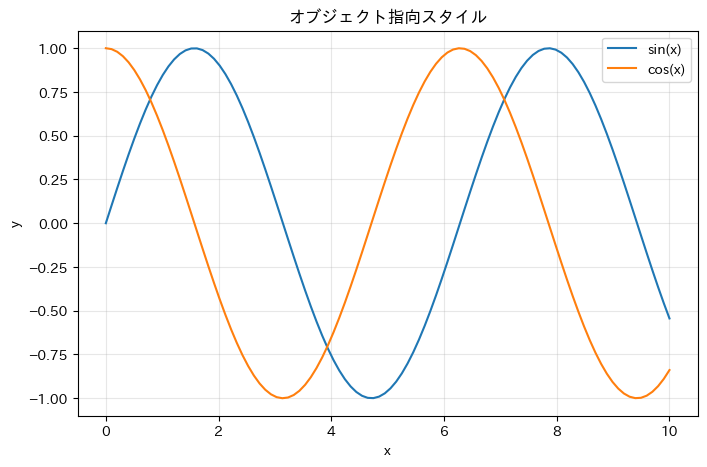

In [8]:
# Figure: キャンバス全体
# Axes: 実際にグラフを描く領域

fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')

# Axes のメソッドで設定
ax.set_title('オブジェクト指向スタイル')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### 2.2 pyplot vs オブジェクト指向

| pyplot | オブジェクト指向 |
|--------|----------------|
| `plt.title()` | `ax.set_title()` |
| `plt.xlabel()` | `ax.set_xlabel()` |
| `plt.ylabel()` | `ax.set_ylabel()` |
| `plt.xlim()` | `ax.set_xlim()` |
| `plt.ylim()` | `ax.set_ylim()` |
| `plt.legend()` | `ax.legend()` |
| `plt.grid()` | `ax.grid()` |

### 2.3 複数の Axes を操作

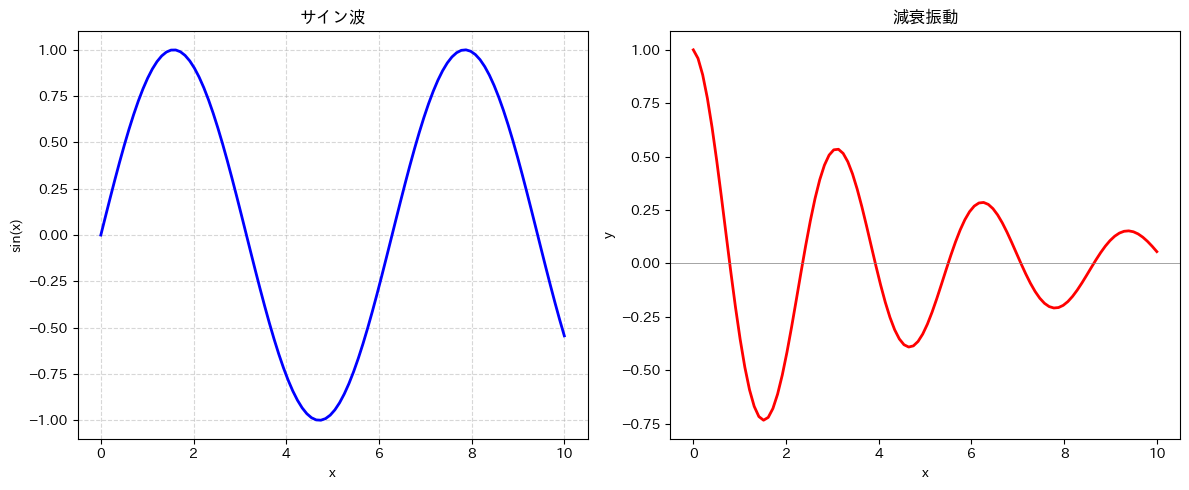

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x = np.linspace(0, 10, 100)

# 左のグラフ
ax1.plot(x, np.sin(x), 'b-', linewidth=2)
ax1.set_title('サイン波')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax1.grid(True, linestyle='--', alpha=0.5)

# 右のグラフ
ax2.plot(x, np.exp(-x/5) * np.cos(2*x), 'r-', linewidth=2)
ax2.set_title('減衰振動')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

### 2.4 2つのy軸を持つグラフ

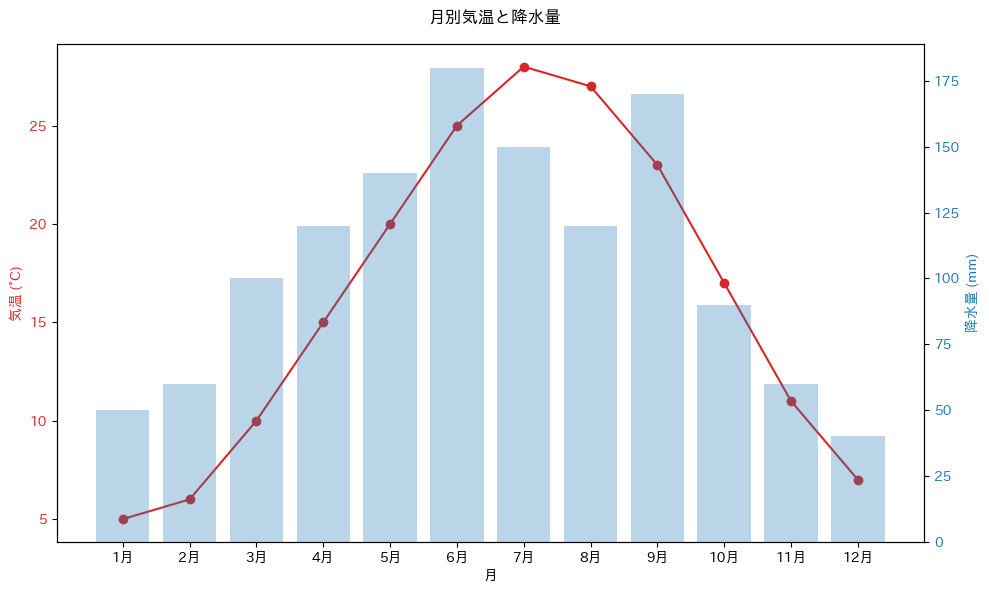

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(1, 13)  # 1〜12月
temperature = [5, 6, 10, 15, 20, 25, 28, 27, 23, 17, 11, 7]  # 気温
precipitation = [50, 60, 100, 120, 140, 180, 150, 120, 170, 90, 60, 40]  # 降水量

# 左のy軸（気温）
color1 = 'tab:red'
ax1.set_xlabel('月')
ax1.set_ylabel('気温 (°C)', color=color1)
line1 = ax1.plot(x, temperature, color=color1, marker='o', label='気温')
ax1.tick_params(axis='y', labelcolor=color1)

# 右のy軸（降水量）- twinx() で作成
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('降水量 (mm)', color=color2)
line2 = ax2.bar(x, precipitation, alpha=0.3, color=color2, label='降水量')
ax2.tick_params(axis='y', labelcolor=color2)

ax1.set_xticks(x)
ax1.set_xticklabels(['1月', '2月', '3月', '4月', '5月', '6月', 
                     '7月', '8月', '9月', '10月', '11月', '12月'])

fig.suptitle('月別気温と降水量')
plt.tight_layout()
plt.show()

### 📝 2章 練習問題

1. オブジェクト指向スタイルで、タイトル、軸ラベル、凡例、グリッドを持つグラフを作成しなさい。
2. 2つのy軸を持つグラフを作成し、異なるスケールのデータを表示しなさい。
3. pyplot スタイルとオブジェクト指向スタイルの利点・欠点を説明しなさい。

In [11]:
# 練習問題の解答欄



---
## 3. 軸の詳細設定

軸の範囲、目盛り、スケールなどを細かく設定する方法を学びます。

### 3.1 軸の範囲

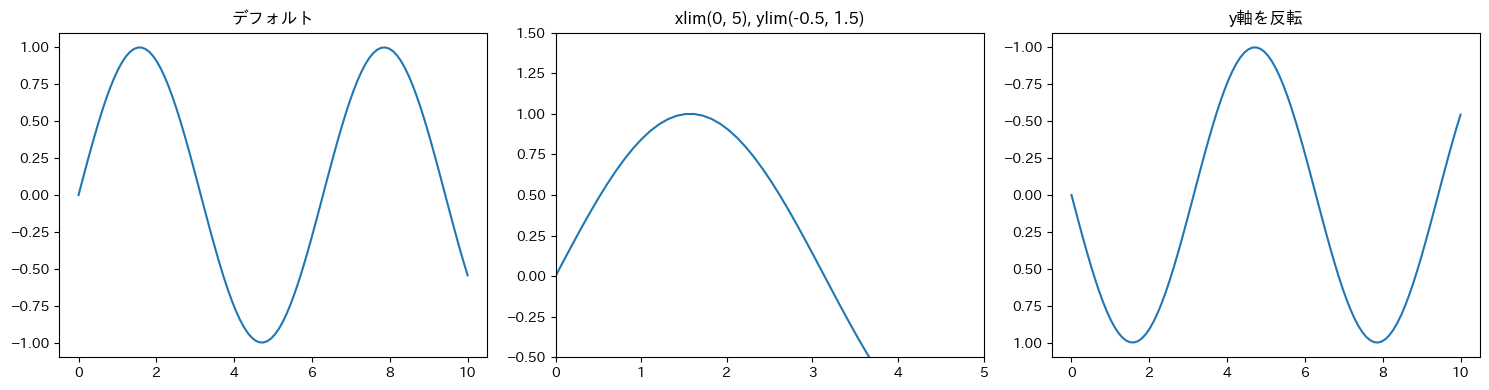

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x = np.linspace(0, 10, 100)
y = np.sin(x)

# デフォルト
axes[0].plot(x, y)
axes[0].set_title('デフォルト')

# 軸範囲を指定
axes[1].plot(x, y)
axes[1].set_xlim(0, 5)
axes[1].set_ylim(-0.5, 1.5)
axes[1].set_title('xlim(0, 5), ylim(-0.5, 1.5)')

# 軸を反転
axes[2].plot(x, y)
axes[2].invert_yaxis()  # y軸を反転
axes[2].set_title('y軸を反転')

plt.tight_layout()
plt.show()

### 3.2 目盛りのカスタマイズ

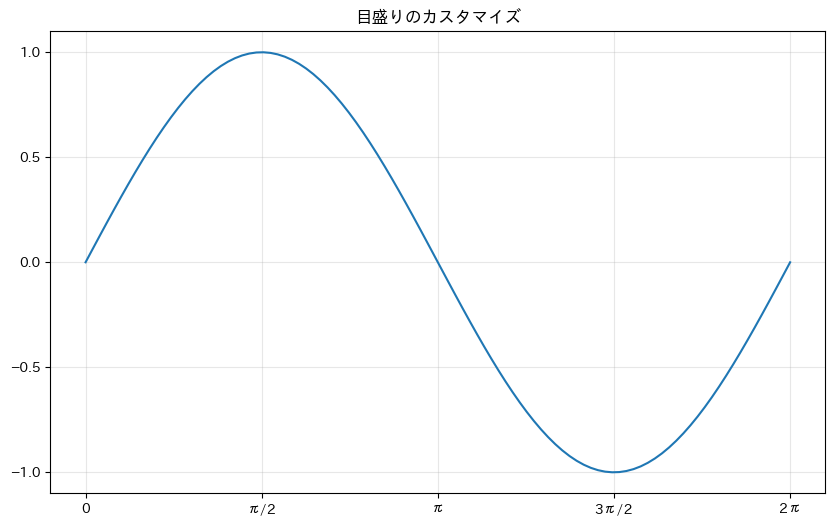

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x))

# x軸の目盛り位置とラベルを設定
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', 'π/2', 'π', '3π/2', '2π'])

# y軸の目盛りを設定
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

# 目盛りラベルの回転
# ax.tick_params(axis='x', rotation=45)

ax.set_title('目盛りのカスタマイズ')
ax.grid(True, alpha=0.3)
plt.show()

### 3.3 対数スケール

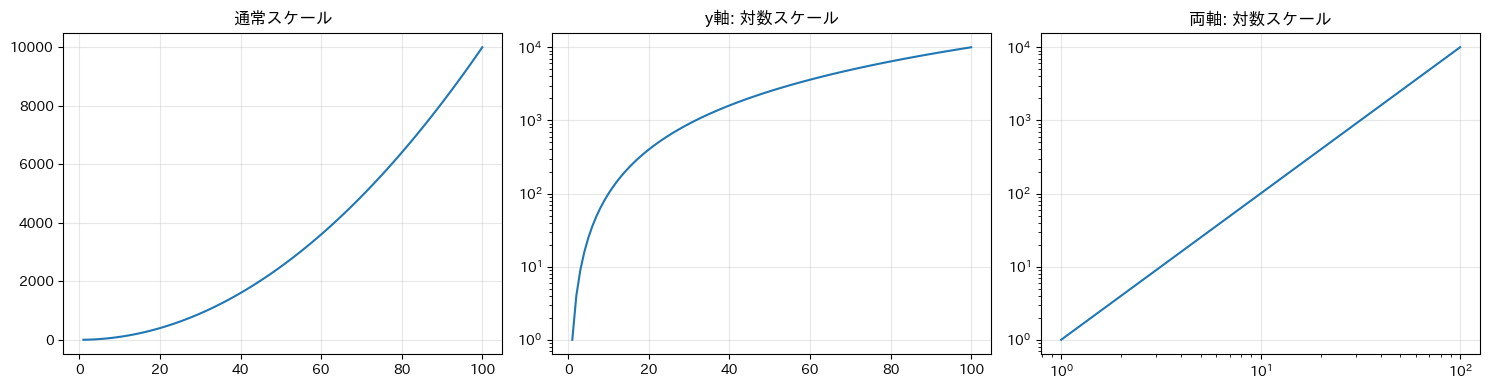

In [14]:
x = np.linspace(1, 100, 100)
y = x ** 2

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 通常スケール
axes[0].plot(x, y)
axes[0].set_title('通常スケール')

# y軸を対数スケール
axes[1].plot(x, y)
axes[1].set_yscale('log')
axes[1].set_title('y軸: 対数スケール')

# 両軸を対数スケール
axes[2].plot(x, y)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('両軸: 対数スケール')

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 軸のフォーマット

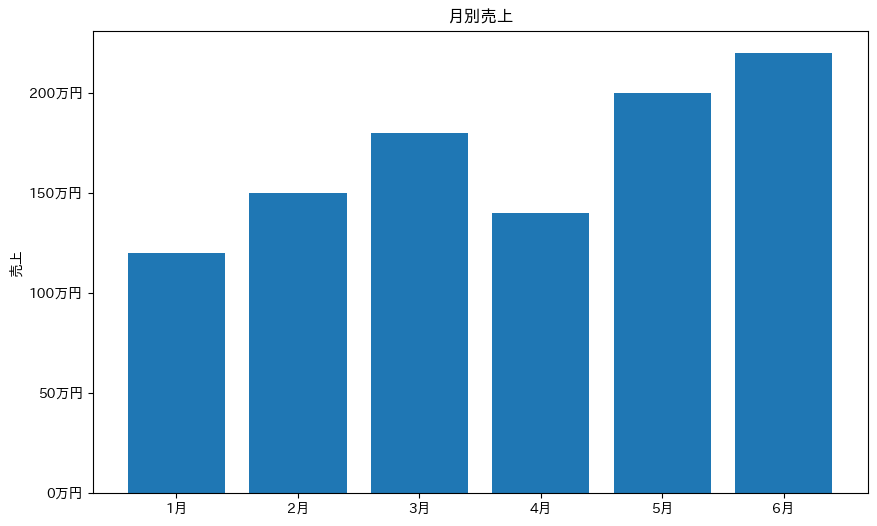

In [15]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 6))

months = ['1月', '2月', '3月', '4月', '5月', '6月']
sales = [1200000, 1500000, 1800000, 1400000, 2000000, 2200000]

ax.bar(months, sales)

# y軸を万円単位で表示
def yen_formatter(x, pos):
    return f'{x/10000:.0f}万円'

ax.yaxis.set_major_formatter(FuncFormatter(yen_formatter))
ax.set_title('月別売上')
ax.set_ylabel('売上')

plt.show()

### 📝 3章 練習問題

1. x軸を0〜2π、y軸を-1.5〜1.5に設定したsin関数のグラフを描きなさい。
2. 指数関数 y = e^x を対数スケールで表示しなさい。
3. パーセント表示のy軸を持つグラフを作成しなさい。

In [16]:
# 練習問題の解答欄



---
## 4. 注釈とテキスト

グラフ上にテキストや注釈を追加する方法を学びます。

### 4.1 テキストの追加

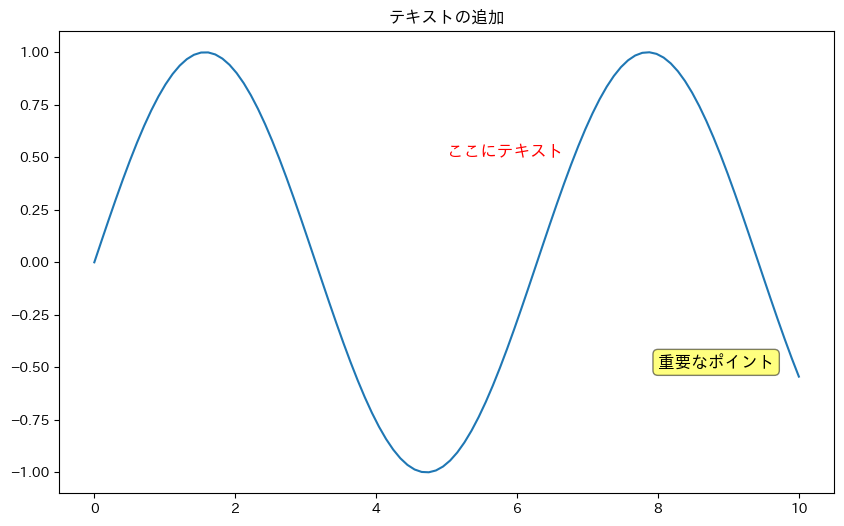

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

# テキストを追加（データ座標で位置指定）
ax.text(5, 0.5, 'ここにテキスト', fontsize=12, color='red')

# ボックス付きテキスト
ax.text(8, -0.5, '重要なポイント', fontsize=12,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax.set_title('テキストの追加')
plt.show()

### 4.2 注釈（矢印付き）

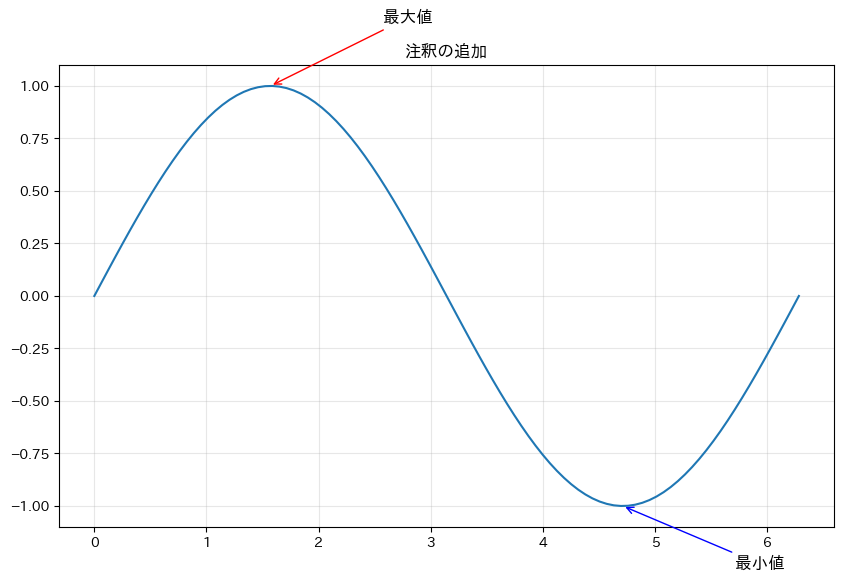

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x))

# 最大値に注釈
ax.annotate('最大値',
            xy=(np.pi/2, 1),           # 矢印の先端
            xytext=(np.pi/2 + 1, 1.3), # テキストの位置
            fontsize=12,
            arrowprops=dict(arrowstyle='->', color='red'))

# 最小値に注釈
ax.annotate('最小値',
            xy=(3*np.pi/2, -1),
            xytext=(3*np.pi/2 + 1, -1.3),
            fontsize=12,
            arrowprops=dict(arrowstyle='->', color='blue'))

ax.set_title('注釈の追加')
ax.grid(True, alpha=0.3)
plt.show()

### 4.3 水平線・垂直線

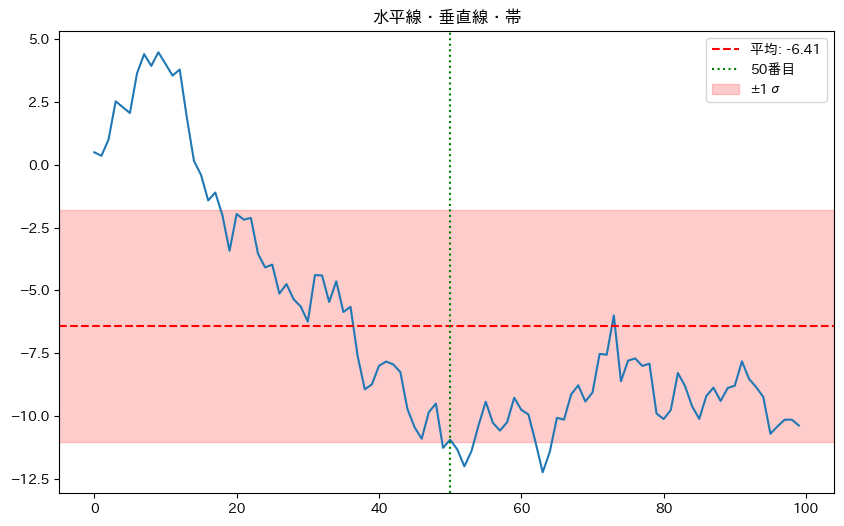

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

np.random.seed(42)
data = np.random.randn(100).cumsum()

ax.plot(data)

# 水平線（平均）
mean_val = data.mean()
ax.axhline(y=mean_val, color='red', linestyle='--', label=f'平均: {mean_val:.2f}')

# 垂直線（50番目のポイント）
ax.axvline(x=50, color='green', linestyle=':', label='50番目')

# 水平の帯（標準偏差の範囲）
std_val = data.std()
ax.axhspan(mean_val - std_val, mean_val + std_val, alpha=0.2, color='red', label='±1σ')

ax.set_title('水平線・垂直線・帯')
ax.legend()
plt.show()

### 📝 4章 練習問題

1. グラフの特定のポイントに矢印付きの注釈を追加しなさい。
2. 平均値と±標準偏差を示す水平線を追加したグラフを作成しなさい。
3. 重要な期間を示す垂直の帯を追加しなさい。

In [20]:
# 練習問題の解答欄



---
## 5. 箱ひげ図とバイオリンプロット

データの分布を比較するためのグラフを学びます。

### 5.1 箱ひげ図

/tmp/ipykernel_2642/772733204.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=['グループA', 'グループB', 'グループC'], patch_artist=True)


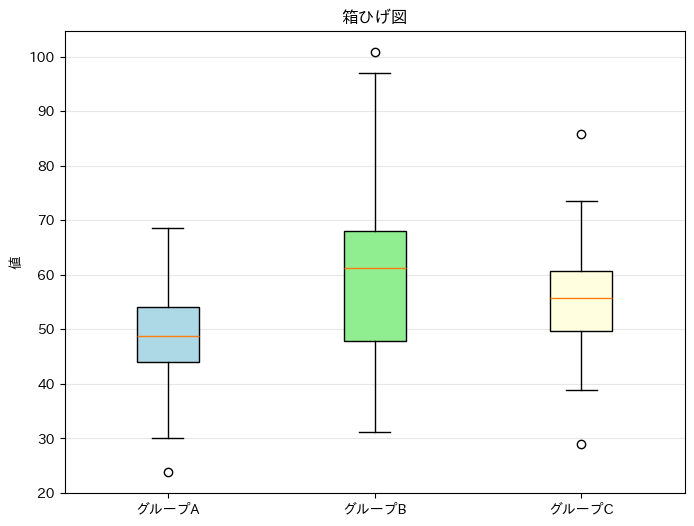

In [21]:
np.random.seed(42)

# 3グループのデータを作成
data = [
    np.random.normal(50, 10, 100),  # グループA
    np.random.normal(60, 15, 100),  # グループB
    np.random.normal(55, 8, 100)    # グループC
]

fig, ax = plt.subplots(figsize=(8, 6))

bp = ax.boxplot(data, labels=['グループA', 'グループB', 'グループC'], patch_artist=True)

# 色を設定
colors = ['lightblue', 'lightgreen', 'lightyellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('箱ひげ図')
ax.set_ylabel('値')
ax.grid(True, axis='y', alpha=0.3)
plt.show()

### 5.2 箱ひげ図の要素

- **箱（Box）**: 第1四分位点（Q1）〜第3四分位点（Q3）
- **中央線**: 中央値（Q2）
- **ひげ（Whisker）**: Q1 - 1.5*IQR 〜 Q3 + 1.5*IQR
- **外れ値**: ひげの範囲外のデータ点
- **IQR**: 四分位範囲（Q3 - Q1）

### 5.3 バイオリンプロット

/tmp/ipykernel_2642/2326141286.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data, labels=['A', 'B', 'C'])


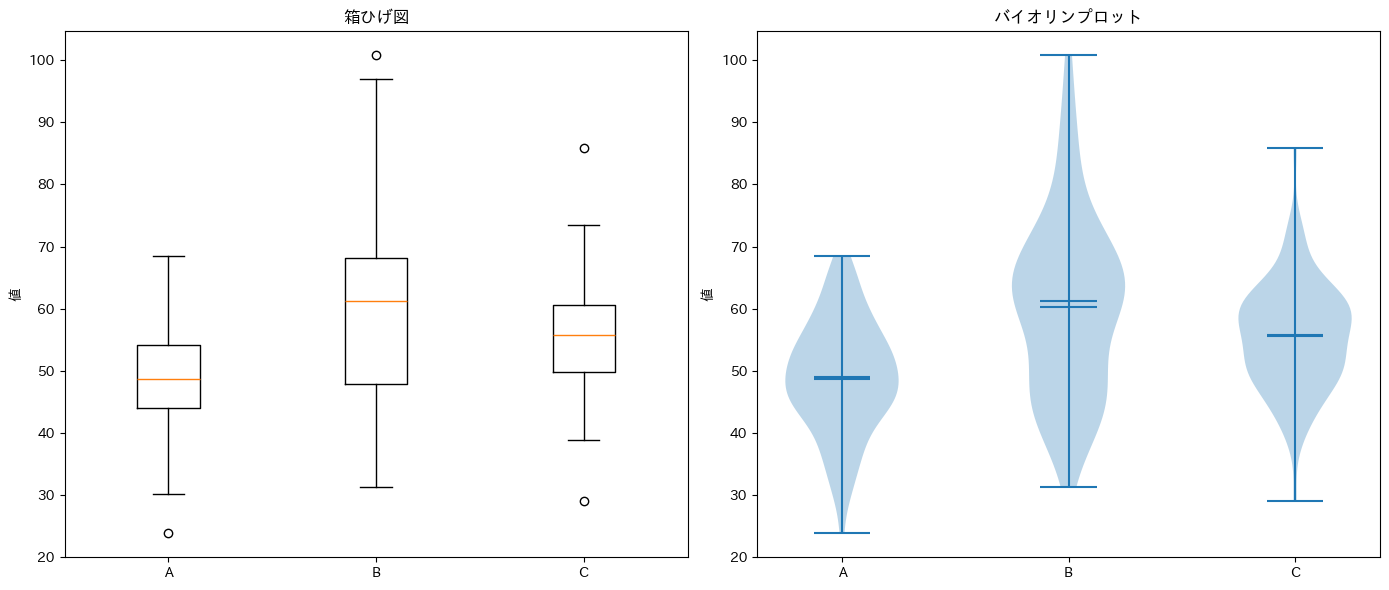

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 箱ひげ図
axes[0].boxplot(data, labels=['A', 'B', 'C'])
axes[0].set_title('箱ひげ図')
axes[0].set_ylabel('値')

# バイオリンプロット
vp = axes[1].violinplot(data, positions=[1, 2, 3], showmeans=True, showmedians=True)
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(['A', 'B', 'C'])
axes[1].set_title('バイオリンプロット')
axes[1].set_ylabel('値')

plt.tight_layout()
plt.show()

### 5.4 水平方向の箱ひげ図

/tmp/ipykernel_2642/2495321958.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['グループA', 'グループB', 'グループC'],


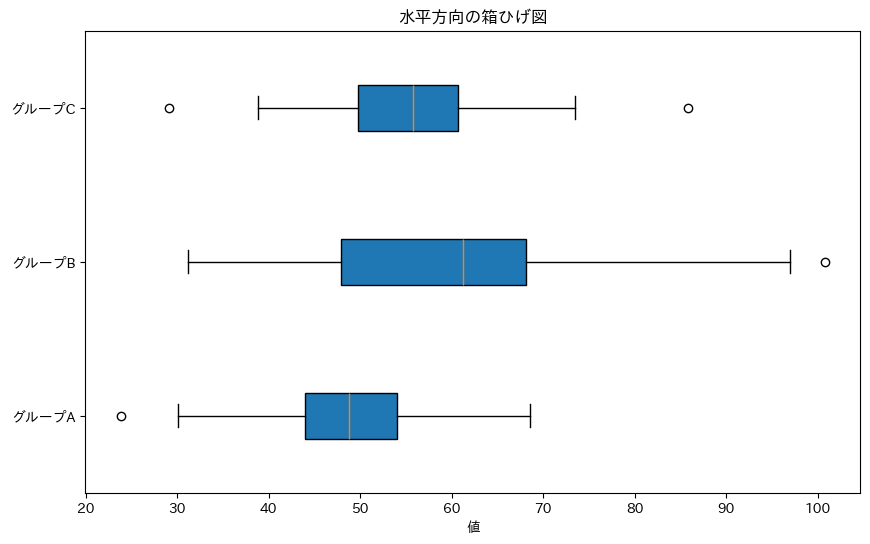

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(data, labels=['グループA', 'グループB', 'グループC'], 
           vert=False, patch_artist=True)

ax.set_title('水平方向の箱ひげ図')
ax.set_xlabel('値')
plt.show()

### 📝 5章 練習問題

1. 5つのグループのデータを作成し、箱ひげ図で比較しなさい。
2. 箱ひげ図とバイオリンプロットの違いを説明しなさい。
3. 外れ値を含むデータを作成し、箱ひげ図で外れ値がどのように表示されるか確認しなさい。

In [24]:
# 練習問題の解答欄



---
## 6. ヒートマップと等高線図

2次元データを色で表現するグラフを学びます。

### 6.1 ヒートマップ（imshow）

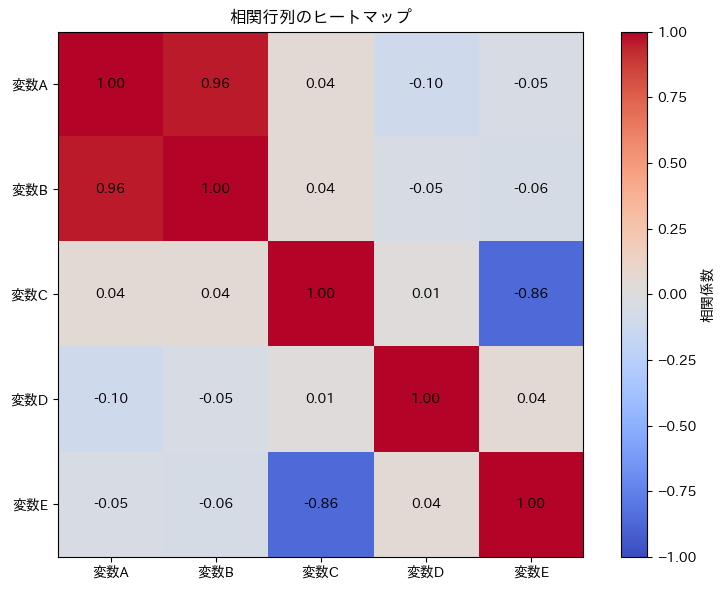

In [25]:
# 相関行列のヒートマップ
np.random.seed(42)
data = np.random.randn(100, 5)
data[:, 1] = data[:, 0] + np.random.randn(100) * 0.3  # 0列と1列に相関
data[:, 4] = -data[:, 2] + np.random.randn(100) * 0.5  # 2列と4列に負の相関

corr = np.corrcoef(data.T)

fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# 軸ラベル
labels = ['変数A', '変数B', '変数C', '変数D', '変数E']
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# 値を表示
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{corr[i, j]:.2f}',
                       ha='center', va='center', color='black')

plt.colorbar(im, label='相関係数')
ax.set_title('相関行列のヒートマップ')
plt.tight_layout()
plt.show()

### 6.2 pcolormesh（不規則なグリッド）

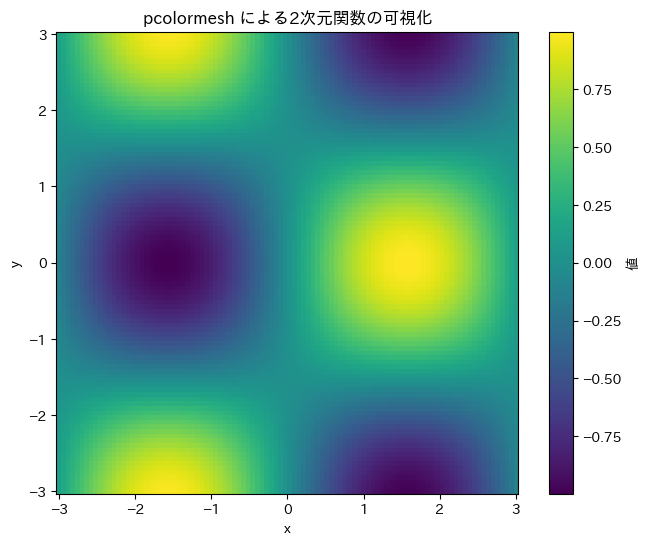

In [26]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, ax = plt.subplots(figsize=(8, 6))

pcm = ax.pcolormesh(X, Y, Z, cmap='viridis', shading='auto')
plt.colorbar(pcm, label='値')

ax.set_title('pcolormesh による2次元関数の可視化')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plt.show()

### 6.3 等高線図（contour）

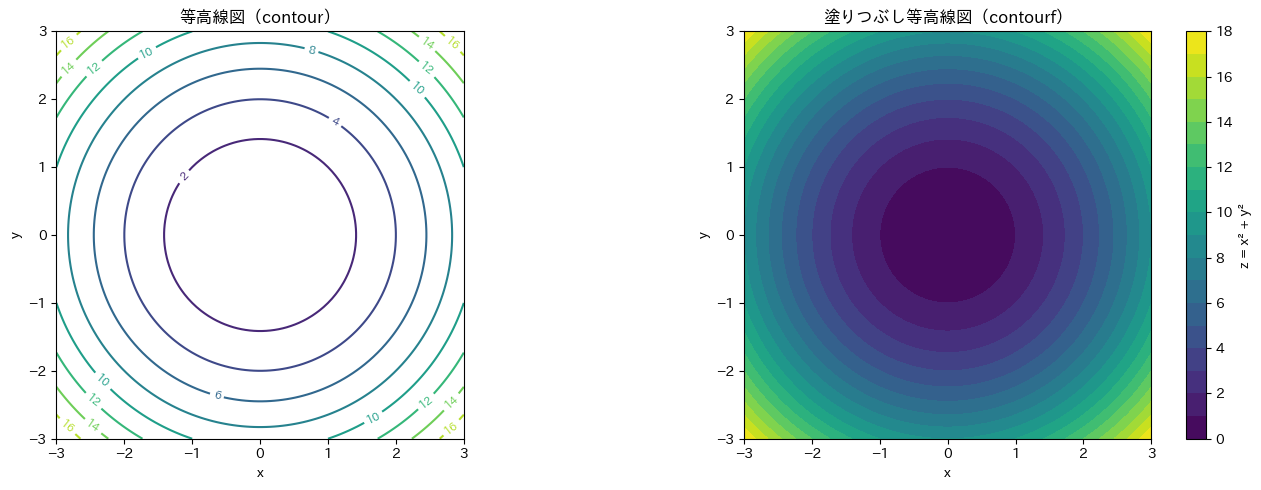

In [27]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # 放物面

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 等高線のみ
cs = axes[0].contour(X, Y, Z, levels=10, cmap='viridis')
axes[0].clabel(cs, inline=True, fontsize=8)  # 等高線にラベル
axes[0].set_title('等高線図（contour）')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_aspect('equal')

# 塗りつぶし等高線
cf = axes[1].contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(cf, ax=axes[1], label='z = x² + y²')
axes[1].set_title('塗りつぶし等高線図（contourf）')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

### 📝 6章 練習問題

1. 5×5のランダムなデータでヒートマップを作成しなさい。
2. $z = \sin(x) + \cos(y)$ の等高線図を描きなさい。
3. ヒートマップと等高線図の使い分けについて説明しなさい。

In [28]:
# 練習問題の解答欄



---
## 7. スタイルとテーマ

グラフ全体の見た目を変更するスタイルの使い方を学びます。

### 7.1 利用可能なスタイル

In [29]:
print("利用可能なスタイル:")
print(plt.style.available)

利用可能なスタイル:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 7.2 スタイルの比較

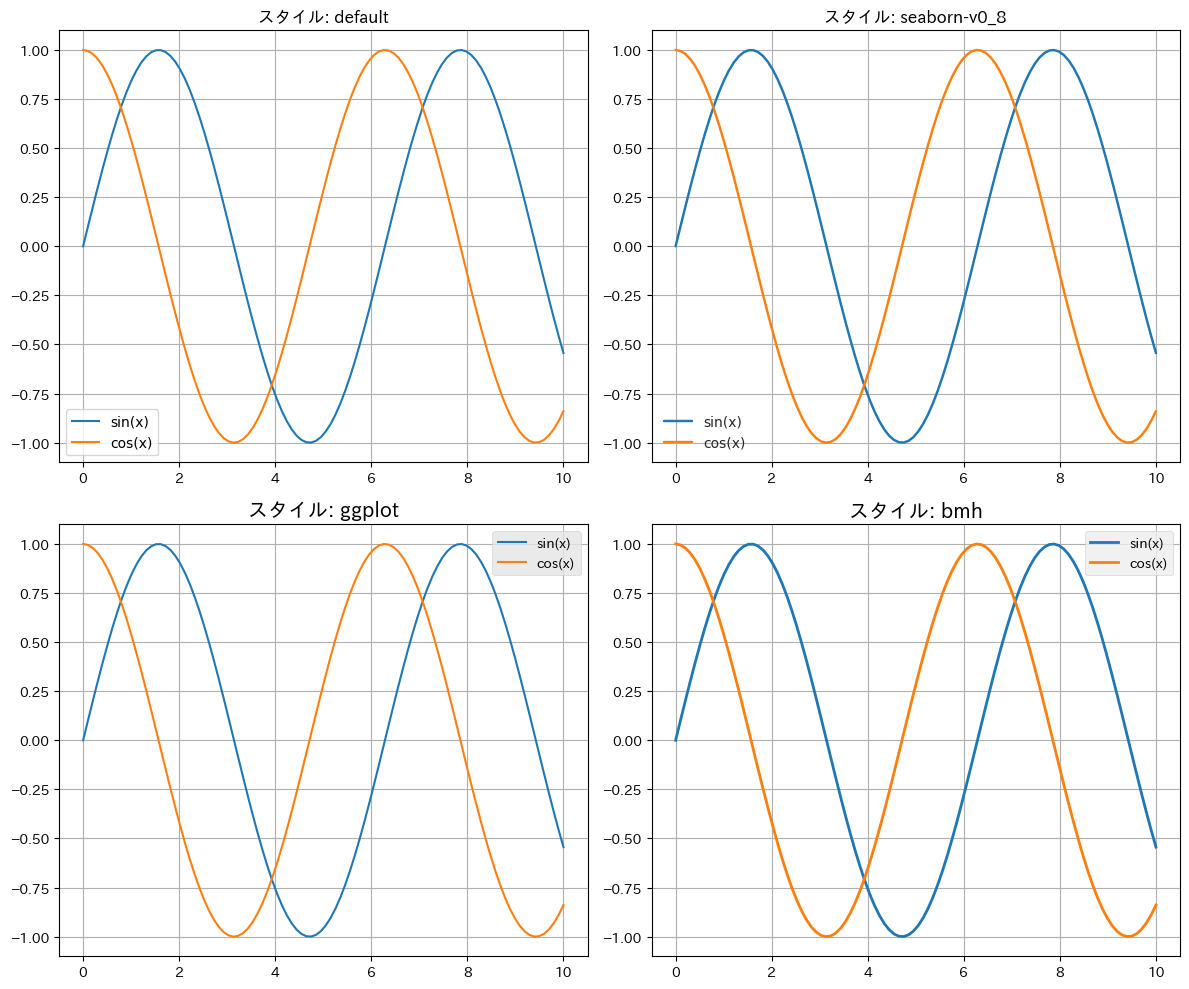

In [30]:
x = np.linspace(0, 10, 100)
styles = ['default', 'seaborn-v0_8', 'ggplot', 'bmh']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, style in zip(axes, styles):
    with plt.style.context(style):
        ax.plot(x, np.sin(x), label='sin(x)')
        ax.plot(x, np.cos(x), label='cos(x)')
        ax.set_title(f'スタイル: {style}')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

### 7.3 カスタムスタイル（rcParams）

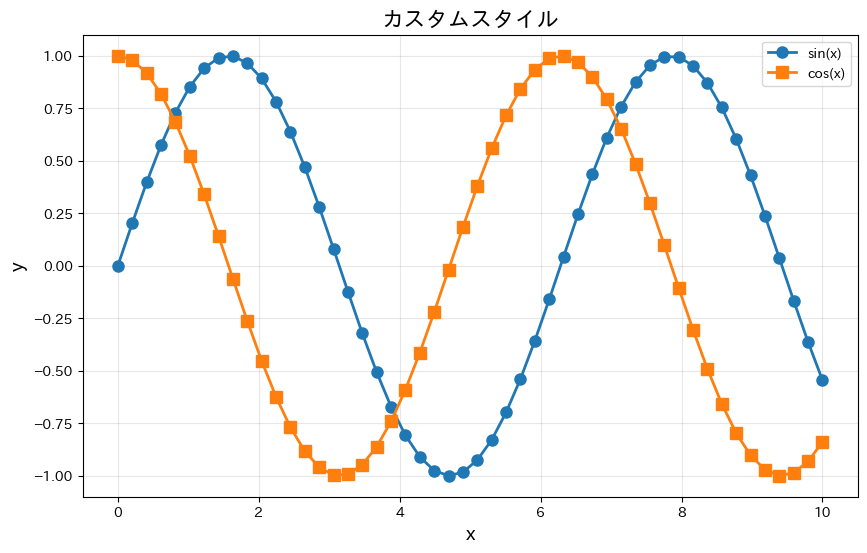

In [31]:
# 一時的に設定を変更
with plt.rc_context({'figure.figsize': (10, 6),
                     'axes.titlesize': 16,
                     'axes.labelsize': 14,
                     'lines.linewidth': 2,
                     'lines.markersize': 8,
                     'axes.grid': True,
                     'grid.alpha': 0.3}):
    
    x = np.linspace(0, 10, 50)
    plt.plot(x, np.sin(x), 'o-', label='sin(x)')
    plt.plot(x, np.cos(x), 's-', label='cos(x)')
    plt.title('カスタムスタイル')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 7.4 カラーマップ

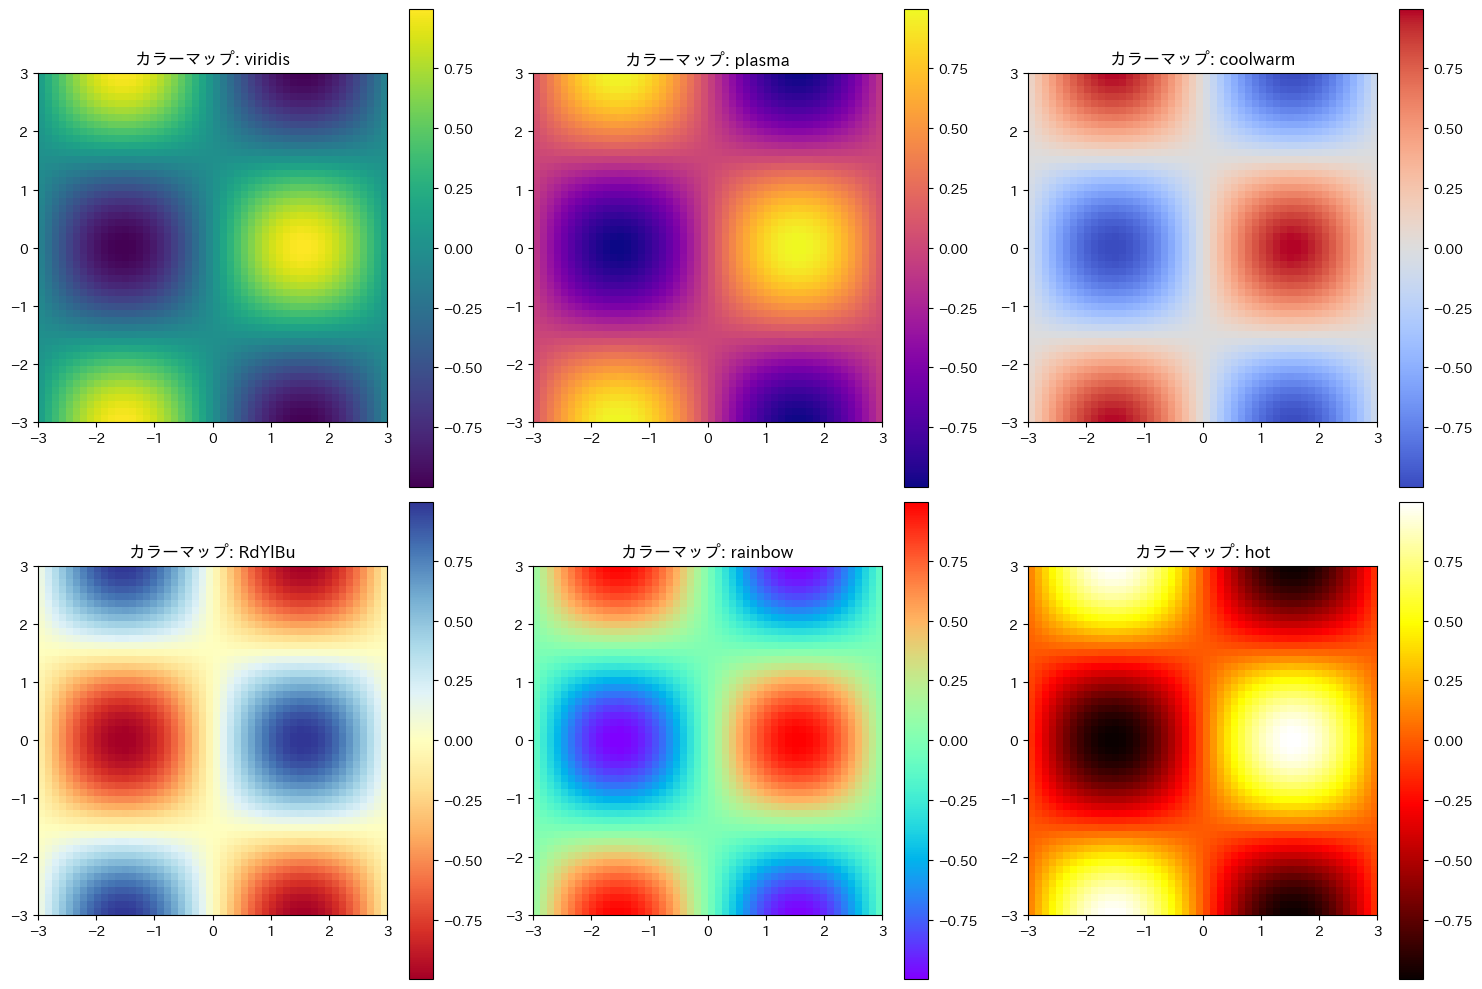

In [32]:
# よく使うカラーマップ
cmaps = ['viridis', 'plasma', 'coolwarm', 'RdYlBu', 'rainbow', 'hot']

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, cmap in zip(axes, cmaps):
    im = ax.imshow(Z, cmap=cmap, extent=[-3, 3, -3, 3])
    ax.set_title(f'カラーマップ: {cmap}')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

### 📝 7章 練習問題

1. 3つの異なるスタイルで同じグラフを描き、比較しなさい。
2. rcParams を使って、フォントサイズと線の太さをカスタマイズしたグラフを作成しなさい。
3. 異なるカラーマップでヒートマップを描き、データの見え方の違いを確認しなさい。

In [33]:
# 練習問題の解答欄



---
## 8. pandas との連携

pandas DataFrame から直接グラフを描画する方法を学びます。

### 8.1 DataFrame.plot()

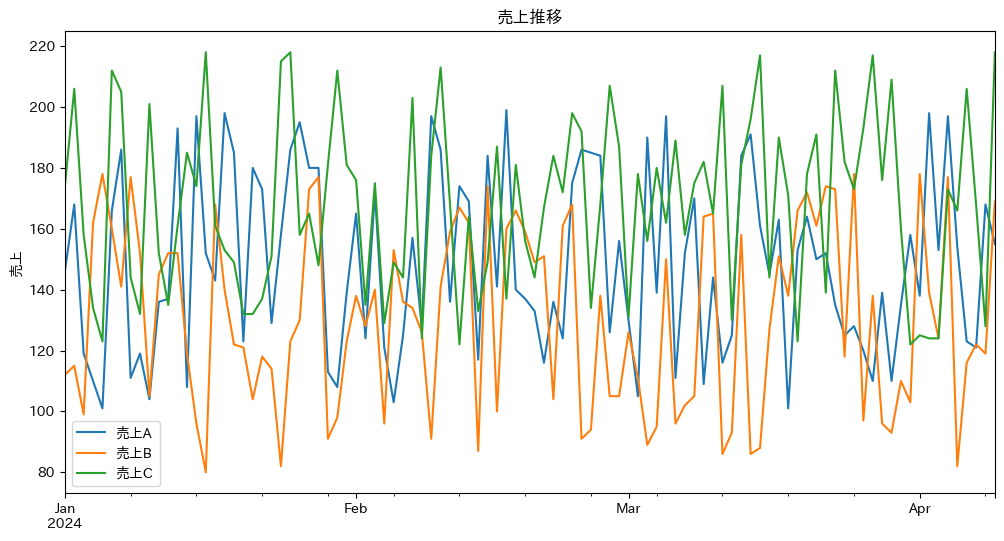

In [34]:
# サンプルデータ作成
dates = pd.date_range('2024-01-01', periods=100, freq='D')
df = pd.DataFrame({
    '売上A': np.random.randint(100, 200, 100),
    '売上B': np.random.randint(80, 180, 100),
    '売上C': np.random.randint(120, 220, 100)
}, index=dates)

# 折れ線グラフ
df.plot(figsize=(12, 6), title='売上推移')
plt.ylabel('売上')
plt.show()

### 8.2 さまざまなグラフタイプ

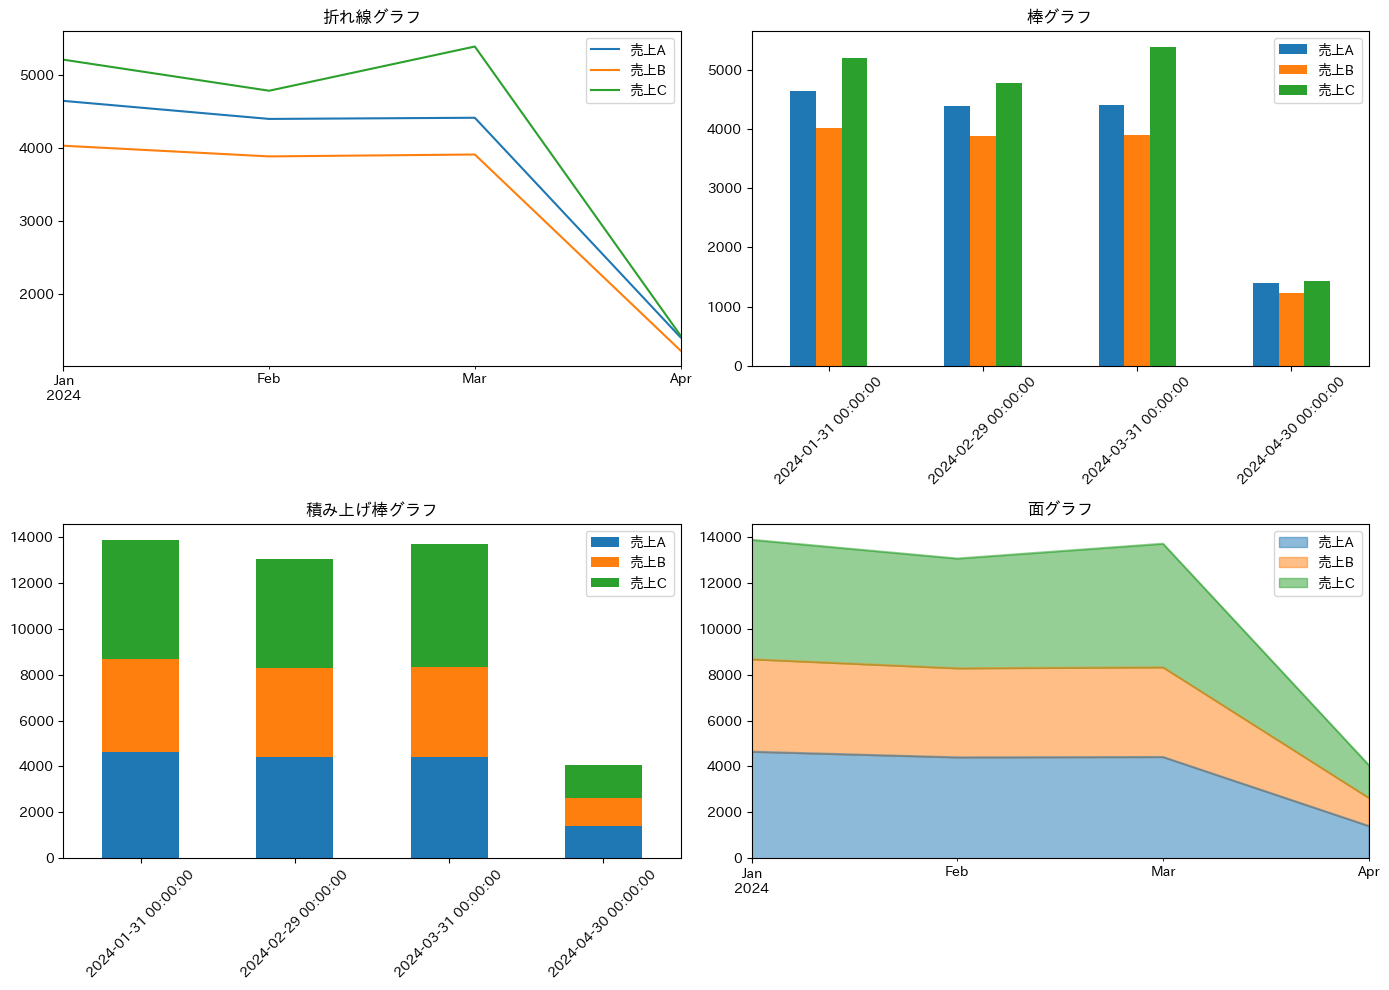

In [35]:
# 月別集計
monthly = df.resample('ME').sum()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 折れ線グラフ
monthly.plot(ax=axes[0, 0], title='折れ線グラフ')

# 棒グラフ
monthly.plot(kind='bar', ax=axes[0, 1], title='棒グラフ')
axes[0, 1].tick_params(axis='x', rotation=45)

# 積み上げ棒グラフ
monthly.plot(kind='bar', stacked=True, ax=axes[1, 0], title='積み上げ棒グラフ')
axes[1, 0].tick_params(axis='x', rotation=45)

# 面グラフ
monthly.plot(kind='area', ax=axes[1, 1], title='面グラフ', alpha=0.5)

plt.tight_layout()
plt.show()

### 8.3 散布図行列

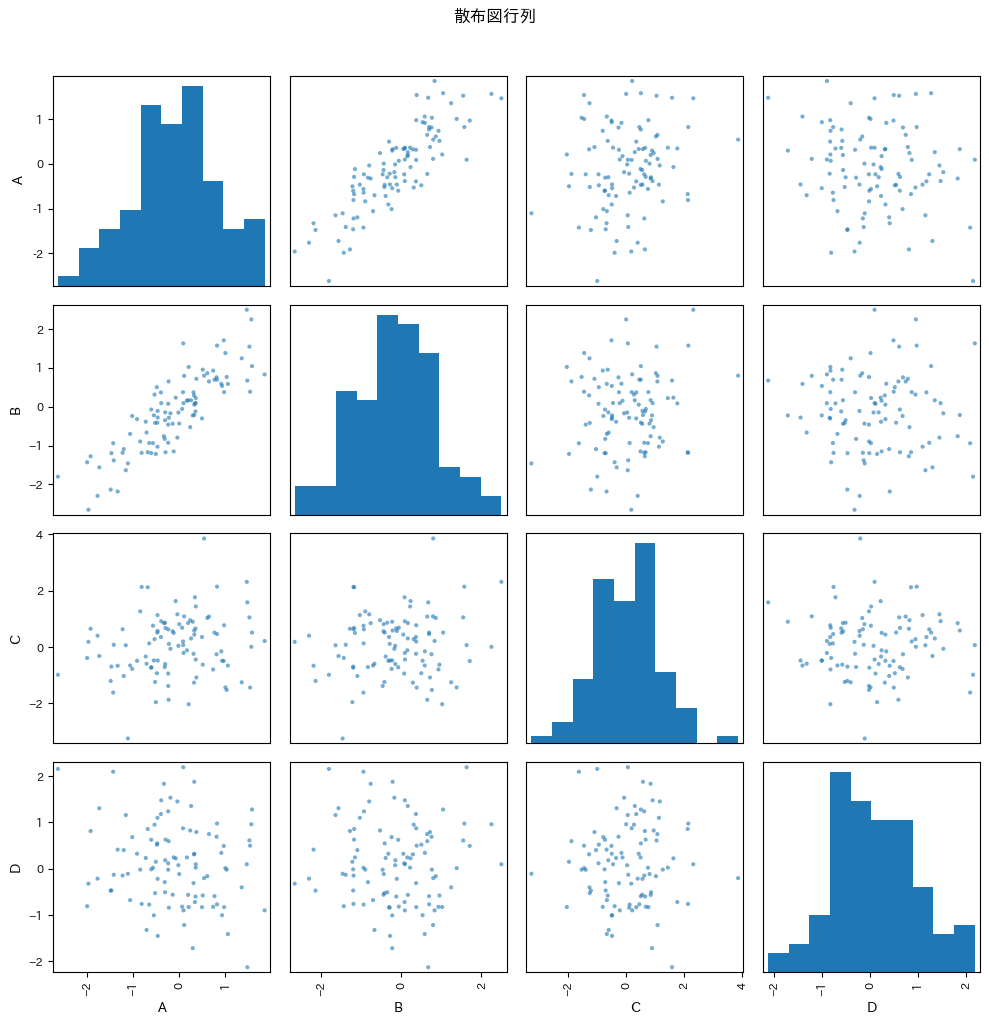

In [36]:
from pandas.plotting import scatter_matrix

# サンプルデータ
np.random.seed(42)
df_scatter = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randn(100),
    'C': np.random.randn(100),
    'D': np.random.randn(100)
})
df_scatter['B'] = df_scatter['A'] + np.random.randn(100) * 0.5  # A と B に相関

scatter_matrix(df_scatter, figsize=(10, 10), diagonal='hist', alpha=0.6)
plt.suptitle('散布図行列', y=1.02)
plt.tight_layout()
plt.show()

### 📝 8章 練習問題

1. DataFrame を作成し、`plot()` メソッドで複数列のグラフを描きなさい。
2. 同じデータを棒グラフと面グラフで表示し、見え方の違いを確認しなさい。
3. 散布図行列を作成し、変数間の関係を分析しなさい。

In [37]:
# 練習問題の解答欄



---
## 9. seaborn との連携

seaborn は matplotlib をベースにした統計的可視化ライブラリです。
より洗練されたデフォルトスタイルと、統計グラフを簡単に作成できます。

### 9.1 seaborn のスタイル設定

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPyt

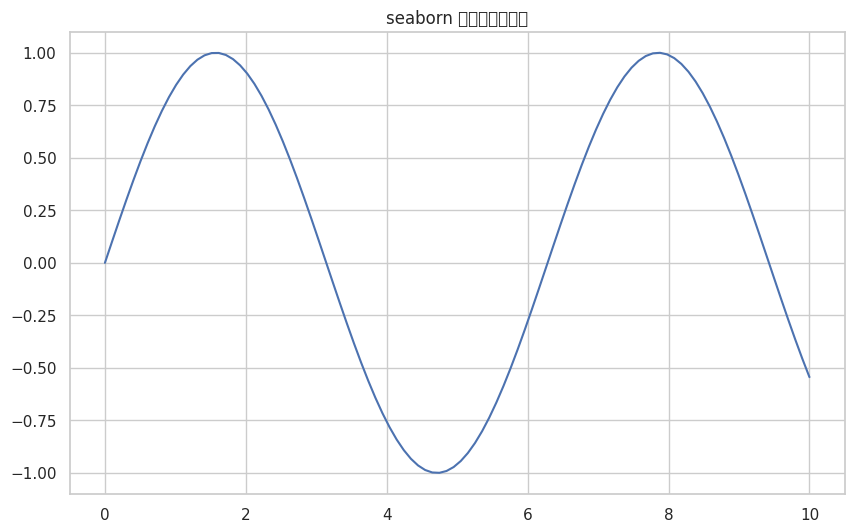

In [38]:
# seaborn のスタイルを適用
sns.set_theme(style='whitegrid')

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.title('seaborn スタイル適用後')
plt.show()

### 9.2 seaborn の統計グラフ

/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/1290394195.py:28: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from fon

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


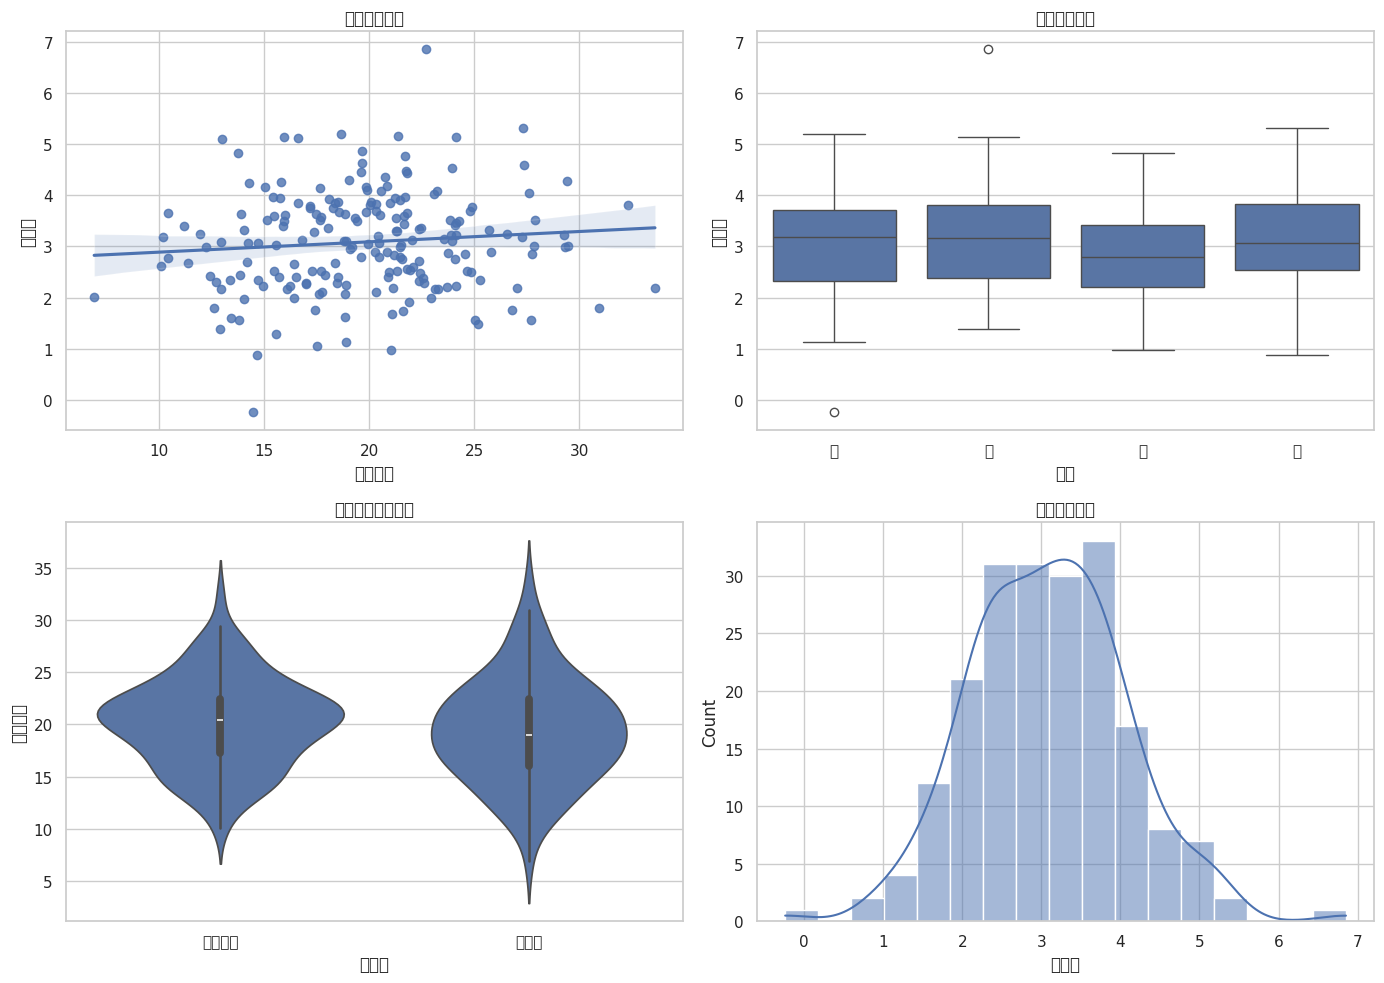

In [39]:
# サンプルデータ
np.random.seed(42)
df_tips = pd.DataFrame({
    '合計金額': np.random.normal(20, 5, 200),
    'チップ': np.random.normal(3, 1, 200),
    '曜日': np.random.choice(['木', '金', '土', '日'], 200),
    '時間帯': np.random.choice(['ランチ', 'ディナー'], 200)
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 散布図（回帰線付き）
sns.regplot(data=df_tips, x='合計金額', y='チップ', ax=axes[0, 0])
axes[0, 0].set_title('回帰プロット')

# 箱ひげ図
sns.boxplot(data=df_tips, x='曜日', y='チップ', ax=axes[0, 1])
axes[0, 1].set_title('曜日別チップ')

# バイオリンプロット
sns.violinplot(data=df_tips, x='時間帯', y='合計金額', ax=axes[1, 0])
axes[1, 0].set_title('時間帯別合計金額')

# ヒストグラム + KDE
sns.histplot(data=df_tips, x='チップ', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('チップの分布')

plt.tight_layout()
plt.show()

### 9.3 カテゴリプロット

/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 26332 (\N{CJK UNIFIED IDEOGRAPH-66DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2642/3759795808.py:12: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing 

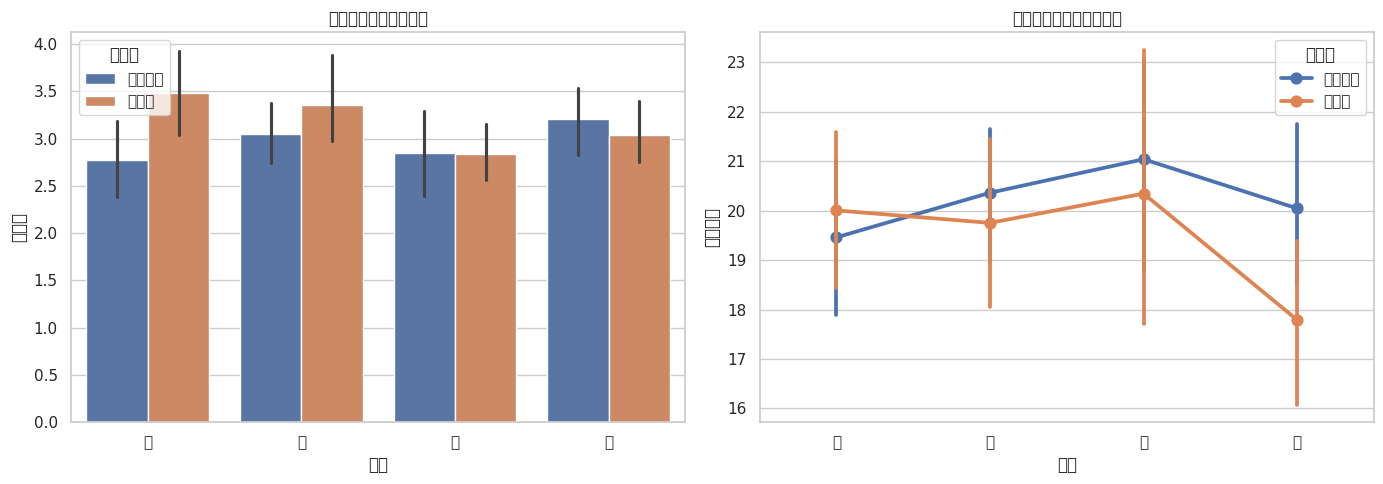

In [40]:
# カテゴリごとの集計
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 棒グラフ（平均と信頼区間）
sns.barplot(data=df_tips, x='曜日', y='チップ', hue='時間帯', ax=axes[0])
axes[0].set_title('曜日・時間帯別チップ')

# ポイントプロット
sns.pointplot(data=df_tips, x='曜日', y='合計金額', hue='時間帯', ax=axes[1])
axes[1].set_title('曜日・時間帯別合計金額')

plt.tight_layout()
plt.show()

### 9.4 ヒートマップ（seaborn版）

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/

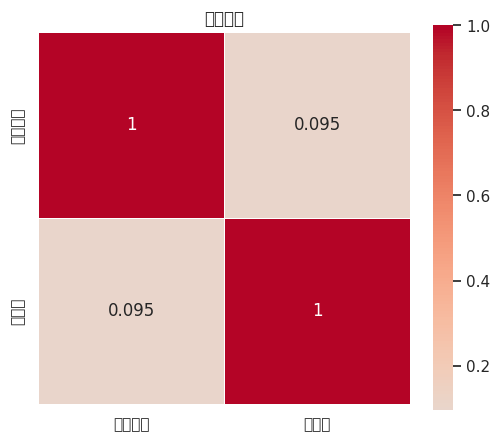

In [41]:
# 相関行列のヒートマップ
corr = df_tips[['合計金額', 'チップ']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('相関行列')
plt.show()

### 9.5 ペアプロット

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/s

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from font(s) DejaVu Sans

/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/katzkawai/jupyterlite-tutorials/.venv/lib/python3.11/site-packages/IPyt

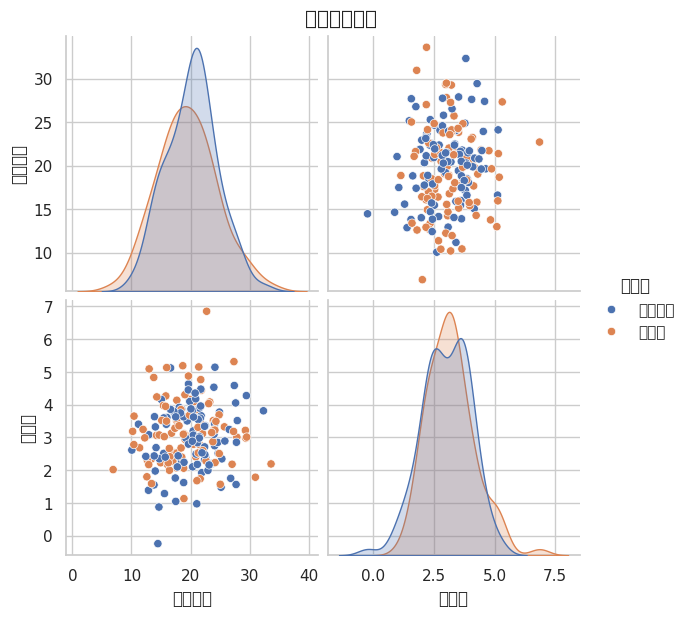

In [42]:
# 数値列のペアプロット
sns.pairplot(df_tips[['合計金額', 'チップ', '時間帯']], hue='時間帯', height=3)
plt.suptitle('ペアプロット', y=1.02)
plt.show()

### 📝 9章 練習問題

1. seaborn で回帰線付きの散布図を作成しなさい。
2. カテゴリごとの分布をバイオリンプロットで比較しなさい。
3. matplotlib と seaborn の使い分けについて説明しなさい。

In [43]:
# 練習問題の解答欄



---
## まとめ

このチュートリアルで学んだことをまとめます：

| トピック | 主なメソッド/概念 |
|---------|------------------|
| サブプロット | `plt.subplots()`, `GridSpec` |
| オブジェクト指向 | `fig, ax = plt.subplots()`, `ax.set_*()` |
| 軸設定 | `set_xlim()`, `set_xticks()`, `set_xscale()` |
| 注釈 | `ax.text()`, `ax.annotate()`, `axhline()`, `axvline()` |
| 箱ひげ図 | `plt.boxplot()`, `plt.violinplot()` |
| ヒートマップ | `plt.imshow()`, `plt.pcolormesh()`, `plt.contour()` |
| スタイル | `plt.style.use()`, `plt.rcParams` |
| pandas連携 | `df.plot()`, `scatter_matrix()` |
| seaborn連携 | `sns.regplot()`, `sns.boxplot()`, `sns.heatmap()` |

## 実践的なヒント

1. **再現性**: `np.random.seed()` を使ってランダムデータの再現性を確保
2. **可読性**: 適切なタイトル、ラベル、凡例を常に付ける
3. **保存**: 論文には高解像度（300+ dpi）のPDFやPNGを使用
4. **スタイル**: 目的に合ったスタイルとカラーマップを選択

---
## 総合演習

これまで学んだ内容を使って、以下の課題に挑戦してください。

### 課題：データ分析ダッシュボードの作成

以下の要件を満たすダッシュボードを作成しなさい：

1. **データ準備**: 売上データ（日付、商品カテゴリ、売上金額、数量）を作成

2. **グラフ配置**: GridSpec を使って以下のレイアウトを作成
   - 上段（大）: 売上推移の折れ線グラフ（移動平均線付き）
   - 下段左: カテゴリ別売上の棒グラフ
   - 下段中: 売上金額の分布（ヒストグラム）
   - 下段右: カテゴリ別売上構成比（円グラフ）

3. **装飾**: 各グラフに適切なタイトル、軸ラベル、凡例を追加

4. **保存**: 作成したダッシュボードを高解像度で保存

In [44]:
# サンプルデータ
np.random.seed(42)
dates = pd.date_range('2024-01-01', periods=90, freq='D')
categories = ['電化製品', '食品', '衣類', '日用品']

sales_data = pd.DataFrame({
    '日付': dates,
    '売上': np.random.normal(100000, 20000, 90).clip(min=0),
    'カテゴリ': np.random.choice(categories, 90)
})

In [45]:
# 総合演習の解答欄

